In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import nltk
import gensim
from nltk import tokenize
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from scipy import spatial
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.sequence import pad_sequences

In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/soonam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
data = pd.read_csv("model_training.csv", header = 0)

In [70]:
data = data.head(50000)

In [71]:
del data['Unnamed: 0']

In [2]:
#data.columns

In [1]:
#data.isnull().sum()

In [74]:
label = data['category']

In [3]:
#data['category'].unique()

In [76]:
#data['category'].value_counts()

In [77]:
#data['category']

In [78]:
# 19 unique categories
n_categories = len(label.unique())
n_categories

19

In [79]:
# Imbalance check for labels
label.value_counts()
lable_counts = label.value_counts().to_dict()

In [80]:
dict_labels = lable_counts.keys()
dict_counts = lable_counts.values()

<BarContainer object of 19 artists>

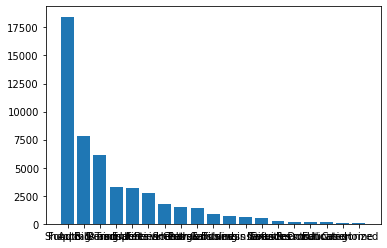

In [81]:
plt.bar(dict_labels,dict_counts)

In [82]:
#data

In [83]:
################MultinomialNB CountVectorizer

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts   = count_vect.fit_transform(data['parsed_description']).toarray()

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_counts, data['category'], test_size=0.3, random_state=0)
print('Data Divided Into Train & Test')

Data Divided Into Train & Test


In [86]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [87]:
#1
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
predict = clf.predict(X_test)
print('Accuracy =====> '+str(round(np.mean(predict == y_test)*100,2))+'%')

Accuracy =====> 91.63%


In [88]:
#3
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1769
           1       0.88      0.96      0.92       998
           2       0.92      0.61      0.73       170
           3       1.00      0.27      0.43        37
           4       0.90      0.88      0.89       823
           5       0.85      0.87      0.86       537
           6       0.93      0.93      0.93      2372
           7       0.91      0.86      0.88       274
           8       1.00      0.12      0.21        67
           9       0.93      0.82      0.87       452
          10       1.00      0.31      0.47        26
          11       0.88      0.81      0.84        73
          12       0.90      0.82      0.86       193
          13       1.00      0.12      0.22        49
          14       0.89      0.89      0.89       988
          15       0.92      0.97      0.94      5544
          16       0.84      0.89      0.86       171
          17       0.94    

/Users/soonam/workspace/python/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

In [ ]:
predictions_SVM = SVM.predict(X_test)

In [ ]:
print('Accuracy =====> '+str(round(np.mean(predictions_SVM == y_test)*100,2))+'%')

In [ ]:
#3
print(classification_report(y_test, predictions_SVM))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['description'], data['category'], test_size=0.3, random_state=0)
print('Data Divided Into Train & Test')

In [ ]:
#  try with TfidVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['description'])

In [ ]:
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [ ]:
NB = MultinomialNB()
NB.fit(Train_X_Tfidf,train_y)

# predict the labels on validation dataset
predictions_NB = NB.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_y)*100)

In [ ]:
# Classifier - Algorithm - SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)
predictions_SVM = SVM.predict(Test_X_Tfidf)

In [ ]:
print('Accuracy =====> '+str(round(np.mean(predictions_SVM == y_test)*100,2))+'%')

In [ ]:
print(classification_report(y_test, predictions_SVM))

In [ ]:
data['description'] = [ every_feature.upper() for every_feature in data['description']]

In [4]:
#SVM


In [5]:
def preprocess_text(df,column):
    import re
    for i in range(len(df)):
        ######  REMOVING SPECIAL CHARACTERS
        df.loc[i,column]  = re.sub(r'\W',' ',str(df.loc[i,column]))
    
        ######  REMOVING ALL SINGLE CHARACTERS
        df.loc[i,column]  = re.sub(r'\s+[a-zA-Z]\s+',' ',str(df.loc[i,column]))
    
        ######  REMOVING MULTIPLE SPACES WITH SINGLE SPACE
        df.loc[i,column]  = re.sub(r'\s+',' ',str(df.loc[i,column]))
    return df

In [ ]:
data_1 = preprocess_text(data,"description")

In [ ]:
#data['description']

In [ ]:
vals = data[data['description'].apply(len)  <5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['parsed_description'], data['category'], test_size=0.3, random_state=0)
print('Data Divided Into Train & Test')

In [ ]:
# Convert to a matrix of TD_IDF features
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['parsed_description'])

In [ ]:
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [143]:
NB = MultinomialNB()
NB.fit(Train_X_Tfidf,train_y)

# predict the labels on validation dataset
predictions_NB = NB.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_y)*100)

Naive Bayes Accuracy Score ->  85.2


In [144]:
print(classification_report(test_y, predictions_NB))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       352
           1       0.94      0.93      0.94       184
           2       0.97      0.62      0.76        50
           3       0.00      0.00      0.00         3
           4       1.00      0.73      0.84       137
           5       0.90      0.56      0.69        93
           6       0.90      0.89      0.89       500
           7       1.00      0.41      0.58        46
           8       0.00      0.00      0.00        12
           9       1.00      0.67      0.80        84
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        15
          12       1.00      0.26      0.41        35
          13       0.00      0.00      0.00        12
          14       0.90      0.80      0.85       194
          15       0.78      1.00      0.88      1172
          16       1.00      0.10      0.18        20
          17       1.00    

/Users/soonam/workspace/python/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
# With Label Encoding : 
2# Test with label encoding and see if there is any change

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts   = count_vect.fit_transform(data['parsed_description']).toarray()
print(X_counts.shape)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_counts, data['category'], test_size=0.3, random_state=0)
print('Data Divided Into Train & Test')

encode = LabelEncoder()
train_y = encode.fit_transform(y_train)
test_y = encode.fit_transform(y_test)

(10000, 2277)
Data Divided Into Train & Test


In [152]:
clf = MultinomialNB().fit(X_train, train_y)
predict = clf.predict(X_test)

print('Accuracy =====> '+str(round(np.mean(predict == test_y)*100,2))+'%')

Accuracy =====> 88.27%


In [ ]:
#Bag of words and TD_IDF dont work as they dont keep the semantic information 
# So Word2Vec can be a better solution where the word is convrted to a vector and the semantic relation between 
# words are kept like man and woman are quite close so the distance between them is quite less 
#so king - man + woman = Queen a vectorial respresentation

In [ ]:
data['parsed_description']

In [11]:
import re

In [12]:
def preprocess_text(df,column):
    for i in range(len(df)):
        ######  REMOVING SPECIAL CHARACTERS
        df.loc[i,column]  = re.sub(r'\W',' ',str(df.loc[i,column]))
    
        ######  REMOVING ALL SINGLE CHARACTERS
        df.loc[i,column]  = re.sub(r'\s+[a-zA-Z]\s+',' ',str(df.loc[i,column]))
    
        ######  REMOVING MULTIPLE SPACES WITH SINGLE SPACE
        df.loc[i,column]  = re.sub(r'\s+',' ',str(df.loc[i,column]))
        
        ######  Remove dates
        df.loc[i,column]  = re.sub(r'\d{2}\w{3}\d{2}',' ',str(df.loc[i,column]))
        
        ######  Remove dates
        df.loc[i,column]  = re.sub(r'\d+',' ',str(df.loc[i,column]))
        
    return df

In [13]:
data_prepro = preprocess_text(data,"parsed_description")

In [14]:
data_prepro["token_desc"]  = [word_tokenize(entry) for entry in data_prepro['parsed_description']]

In [15]:
# Feed a word2vec with the ingredients
w2v = gensim.models.Word2Vec(list(data_prepro["token_desc"]), size=100, window=10, min_count=1, iter=20)

In [16]:
#list(data_prepro["token_desc"])

In [17]:
X = w2v[w2v.wv.vocab]
X.shape

/Users/soonam/workspace/python/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(5638, 100)

/Users/soonam/workspace/python/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.5752181e+00,  1.8090905e-01,  2.1296973e+00,  7.0632333e-01,
       -1.3090183e+00, -5.3888029e-01,  1.0380636e+00, -2.4894917e-01,
        4.2861447e-01,  9.2266805e-02,  1.7981660e+00, -2.9455364e-01,
        1.4408066e+00,  4.1487849e-01,  6.9922310e-01,  2.9777259e-01,
       -2.4439672e-02,  1.1883571e+00, -1.4166850e+00,  8.3509666e-01,
       -1.0270888e+00, -1.3087904e+00,  1.0120401e+00,  4.8424208e-01,
        1.8391587e-01,  2.1563260e-01,  3.5450357e-01, -3.3560640e-01,
        4.8762229e-01,  3.0794433e-01,  1.1596396e+00,  2.9585567e-01,
        2.7195674e-01,  2.6881254e-01, -1.4075682e+00,  1.3702911e+00,
       -6.7684084e-01,  6.1244196e-01,  5.3862834e-01,  5.1837903e-01,
        6.8713504e-01,  5.0597811e-01,  2.6667577e-03, -1.0279514e+00,
       -1.2972076e+00,  7.8533202e-01,  1.3691986e-01,  4.1949412e-01,
        2.1519972e-01, -1.6562970e-01, -1.9540451e+00,  9.9711370e-01,
       -3.4469104e-01, -6.4941484e-01,  8.9159735e-02, -5.8209372e-01,
      

In [19]:
docs_vectors = pd.DataFrame() # creating empty final dataframe
for doc in data_prepro['token_desc']: # looping through each document and cleaning it
    #print(doc)
    for each_word in doc:
        temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        try:
            word_vec = w2v[each_word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
            #print(word_vec)
            temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
            #print(temp)
        except:
            #print("inside except")
            pass
        doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
docs_vectors.shape

/Users/soonam/workspace/python/dev/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(50000, 100)

In [21]:
lb = LabelEncoder()
y = lb.fit_transform(data_prepro['category'])

In [22]:
y_df = pd.DataFrame(y)

In [23]:
docs_vectors['category'] = y_df

In [24]:
#docs_vectors

In [25]:
from sklearn.ensemble import AdaBoostClassifier

train_x, test_x, train_y, test_y = train_test_split(docs_vectors.drop("category", axis=1),
                                                   docs_vectors["category"],
                                                   test_size = 0.2,
                                                   random_state = 1)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((40000, 100), (40000,), (10000, 100), (10000,))

In [26]:
#train_x[1:3]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
36059,-1.538481,0.276422,0.321043,0.471232,0.189898,0.990331,1.534463,-0.699058,0.651058,-0.242871,...,-0.781928,-0.221657,-0.104444,-0.533790,0.347043,-1.637354,0.075054,0.296884,0.046866,-0.033239
13242,-0.004245,0.004415,-0.000757,0.002686,0.001067,0.002297,-0.001661,-0.001841,0.000673,0.001691,...,0.004071,0.003395,0.003613,0.000177,0.003643,0.004237,0.004393,-0.000258,-0.001654,-0.002987


In [29]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [30]:
max_length  = max([len(s) for s in data['parsed_description']])

In [31]:
tokenizer_obj = Tokenizer()
EMBEDDING_DIM = 100

In [32]:
tokenizer_obj.fit_on_texts(data['parsed_description'])

In [33]:
sequences = tokenizer_obj.texts_to_sequences(data['parsed_description'])

In [34]:
word_index = tokenizer_obj.word_index

In [35]:
review_pad = pad_sequences(sequences, maxlen=max_length)

In [36]:
review_pad

array([[   0,    0,    0, ...,    0,    0, 2637],
       [   0,    0,    0, ...,  335,    2,    4],
       [   0,    0,    0, ...,   68,   73,  165],
       ...,
       [   0,    0,    0, ...,  655, 1120,  792],
       [   0,    0,    0, ...,    0,  145,  201],
       [   0,    0,    0, ...,  114,    2,    4]], dtype=int32)

In [37]:
num_words = len(word_index) + 1

In [38]:
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

In [40]:
#filename = "word_embedding_wordvec.txt"
#w2v.wv.save_word2vec_format(filename,binary=False)

In [64]:
w2v.wv

In [41]:
import os

embeddings_index = {}
f = open(os.path.join('','word_embedding_wordvec.txt'), encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()    

In [61]:
embeddings_index

{'2278': array(['100'], dtype='<U3'),
 'STORE': array(['-0.1717179', '-0.11789766', '0.13836478', '0.028432991',
        '0.3879471', '-0.116587825', '0.42387915', '-0.25043687',
        '0.1944129', '-0.063157864', '0.019757004', '-0.14009783',
        '0.25222957', '-0.4236136', '0.42511356', '-0.29732603',
        '0.34257397', '0.10540647', '-0.38009042', '-0.16128176',
        '-0.015381891', '0.1289966', '-0.4255581', '0.18154715',
        '0.028728489', '0.13042419', '-0.0911547', '-0.4108752',
        '0.07152857', '-0.10923271', '0.52158374', '0.19086514',
        '0.011475612', '0.46896818', '-0.55211747', '-0.34466884',
        '0.16674323', '-0.15822625', '-0.024080822', '0.00158353',
        '0.02289013', '-0.41836134', '0.08798292', '-0.34652495',
        '-0.16069072', '0.11452056', '0.10309018', '-0.1622128',
        '-0.2839688', '0.16935615', '-0.09534981', '0.26088968',
        '-0.19245775', '0.22197911', '-0.5714123', '-0.008449408',
        '0.1788963', '-0.273113

In [43]:
for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [44]:
print(num_words)

5639


In [45]:
from keras.initializers import Constant

In [46]:
model3 = Sequential()

In [47]:
num_words,EMBEDDING_DIM,Constant(embedding_matrix),max_length

(5639,
 100,
 40)

In [48]:
embedding_layer = Embedding(num_words,
                    output_dim=EMBEDDING_DIM,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_length,
                    #ask_zero=True,
                    trainable=False)

In [49]:
model3.add(embedding_layer)

In [50]:
model3.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))

In [51]:
model3.add(Dense(19, activation='sigmoid'))

In [52]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 100)           563900    
_________________________________________________________________
gru (GRU)                    (None, 32)                12864     
_________________________________________________________________
dense (Dense)                (None, 19)                627       
Total params: 577,391
Trainable params: 13,491
Non-trainable params: 563,900
_________________________________________________________________


In [54]:
#Validation split
indices = np.arange(review_pad.shape[0]) 

In [55]:
VALIDATION_SPLIT = 0.2

In [56]:
np.random.shuffle(indices)
review_pad = review_pad[indices]
categories =  docs_vectors["category"][indices]
num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0])

In [57]:
X_train_pad = review_pad[:-num_validation_samples]
y_train = categories[:-num_validation_samples]

X_test_pad = review_pad[-num_validation_samples:]
y_test = categories[-num_validation_samples:]

In [58]:
print("Shape of X train ", X_train_pad.shape)
print("Shape of X test ", X_test_pad.shape)

Shape of X train  (40000, 40)
Shape of X test  (10000, 40)


In [59]:
print("Shape of y train ", y_train.shape)
print("Shape of y test ", y_test.shape)

Shape of y train  (40000,)
Shape of y test  (10000,)


In [60]:
history = model3.fit(X_train_pad, y_train, epochs=25, batch_size=128,validation_data=(X_test_pad, y_test) ,verbose=2)

Epoch 1/25
313/313 - 10s - loss: 2.2330 - accuracy: 0.2950 - val_loss: 2.0837 - val_accuracy: 0.3741
Epoch 2/25
313/313 - 10s - loss: 2.0952 - accuracy: 0.3678 - val_loss: 2.0840 - val_accuracy: 0.3741
Epoch 3/25
313/313 - 10s - loss: 2.0949 - accuracy: 0.3678 - val_loss: 2.0846 - val_accuracy: 0.3741
Epoch 4/25
313/313 - 11s - loss: 2.0949 - accuracy: 0.3678 - val_loss: 2.0838 - val_accuracy: 0.3741
Epoch 5/25
313/313 - 11s - loss: 2.0952 - accuracy: 0.3678 - val_loss: 2.0852 - val_accuracy: 0.3741
Epoch 6/25
313/313 - 10s - loss: 2.0955 - accuracy: 0.3678 - val_loss: 2.0856 - val_accuracy: 0.3741
Epoch 7/25
313/313 - 11s - loss: 2.0950 - accuracy: 0.3678 - val_loss: 2.0841 - val_accuracy: 0.3741
Epoch 8/25
313/313 - 11s - loss: 2.0949 - accuracy: 0.3678 - val_loss: 2.0844 - val_accuracy: 0.3741
Epoch 9/25
313/313 - 11s - loss: 2.0948 - accuracy: 0.3678 - val_loss: 2.0848 - val_accuracy: 0.3741
Epoch 10/25
313/313 - 10s - loss: 2.0950 - accuracy: 0.3678 - val_loss: 2.0853 - val_accura

In [427]:
X_train_pad

array([[  0,   0,   0, ...,   0,  30,  31],
       [  0,   0,   0, ...,  90,   6, 124],
       [  0,   0,   0, ...,  21,   6,  23],
       ...,
       [  0,   0,   0, ..., 330,   2,  11],
       [  0,   0,   0, ...,   0, 417, 132],
       [  0,   0,   0, ...,   0,  18,  22]], dtype=int32)